# **Student Dropout Analysis for School Education**

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 1. Importing Required Libraries </b></p>
</div>

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier


: 

In [ ]:
data = pd.read_csv("student2.csv")
data.head()

,YEAR,state_cd,state_name,district_cd,district_name,class_1_boys,class_1_girls,category,dropout,poverty_index,unemployement_rate,no_of_schools,Target
0,2019-20,24,Gujarat,2401,KACHCHH,36,57,OBC,5.0,4.0,2.0,23,mid
1,2019-20,24,Gujarat,2402,BANAS KANTHA,79,87,OBC,4.0,1.0,5.0,14,low
2,2019-20,24,Gujarat,2403,PATAN,25,27,OBC,7.0,2.0,6.0,20,high
3,2019-20,24,Gujarat,2404,MAHESANA,21,20,OBC,8.0,3.0,4.0,15,high
4,2019-20,24,Gujarat,2405,SABAR KANTHA,16,5,OBC,4.0,5.0,1.0,10,mid


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                39 non-null     object 
 1   state_cd            39 non-null     int64  
 2   state_name          39 non-null     object 
 3   district_cd         39 non-null     int64  
 4   district_name       39 non-null     object 
 5   class_1_boys        39 non-null     int64  
 6   class_1_girls       39 non-null     int64  
 7   category            39 non-null     object 
 8   dropout             39 non-null     float64
 9   poverty_index       39 non-null     float64
 10  unemployement_rate  39 non-null     float64
 11  no_of_schools       39 non-null     int64  
 12  Target              39 non-null     object 
dtypes: float64(3), int64(5), object(5)
memory usage: 4.1+ KB


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 2. Data Preprocessing </b></p>
</div>

In [44]:
data.rename(columns = {'class_1_boys':'Boys_enrolled', 'class_1_girls':'Girls_enrolled'}, inplace = True)

checking whether there is any null values in this dataset

In [45]:
data.isnull().sum()/len(data)*100

YEAR                  0.0
state_cd              0.0
state_name            0.0
district_cd           0.0
district_name         0.0
Boys_enrolled         0.0
Girls_enrolled        0.0
category              0.0
dropout               0.0
poverty_index         0.0
unemployement_rate    0.0
no_of_schools         0.0
Target                0.0
dtype: float64

In [47]:
print(data["Target"].unique())

['mid' 'low' 'high']


In [48]:
data['Target'] = data['Target'].map({
    'low':0,
    'mid':1,
    'high':2
})

In [49]:
print(data["Target"].unique())

[1 0 2]


In [50]:
data.corr()['Target']

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_1492\2400667588.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



state_cd                   NaN
district_cd          -0.022876
Boys_enrolled         0.239817
Girls_enrolled        0.162961
dropout               0.626691
poverty_index        -0.022319
unemployement_rate   -0.150788
no_of_schools         0.248026
Target                1.000000
Name: Target, dtype: float64

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_1492\250993319.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



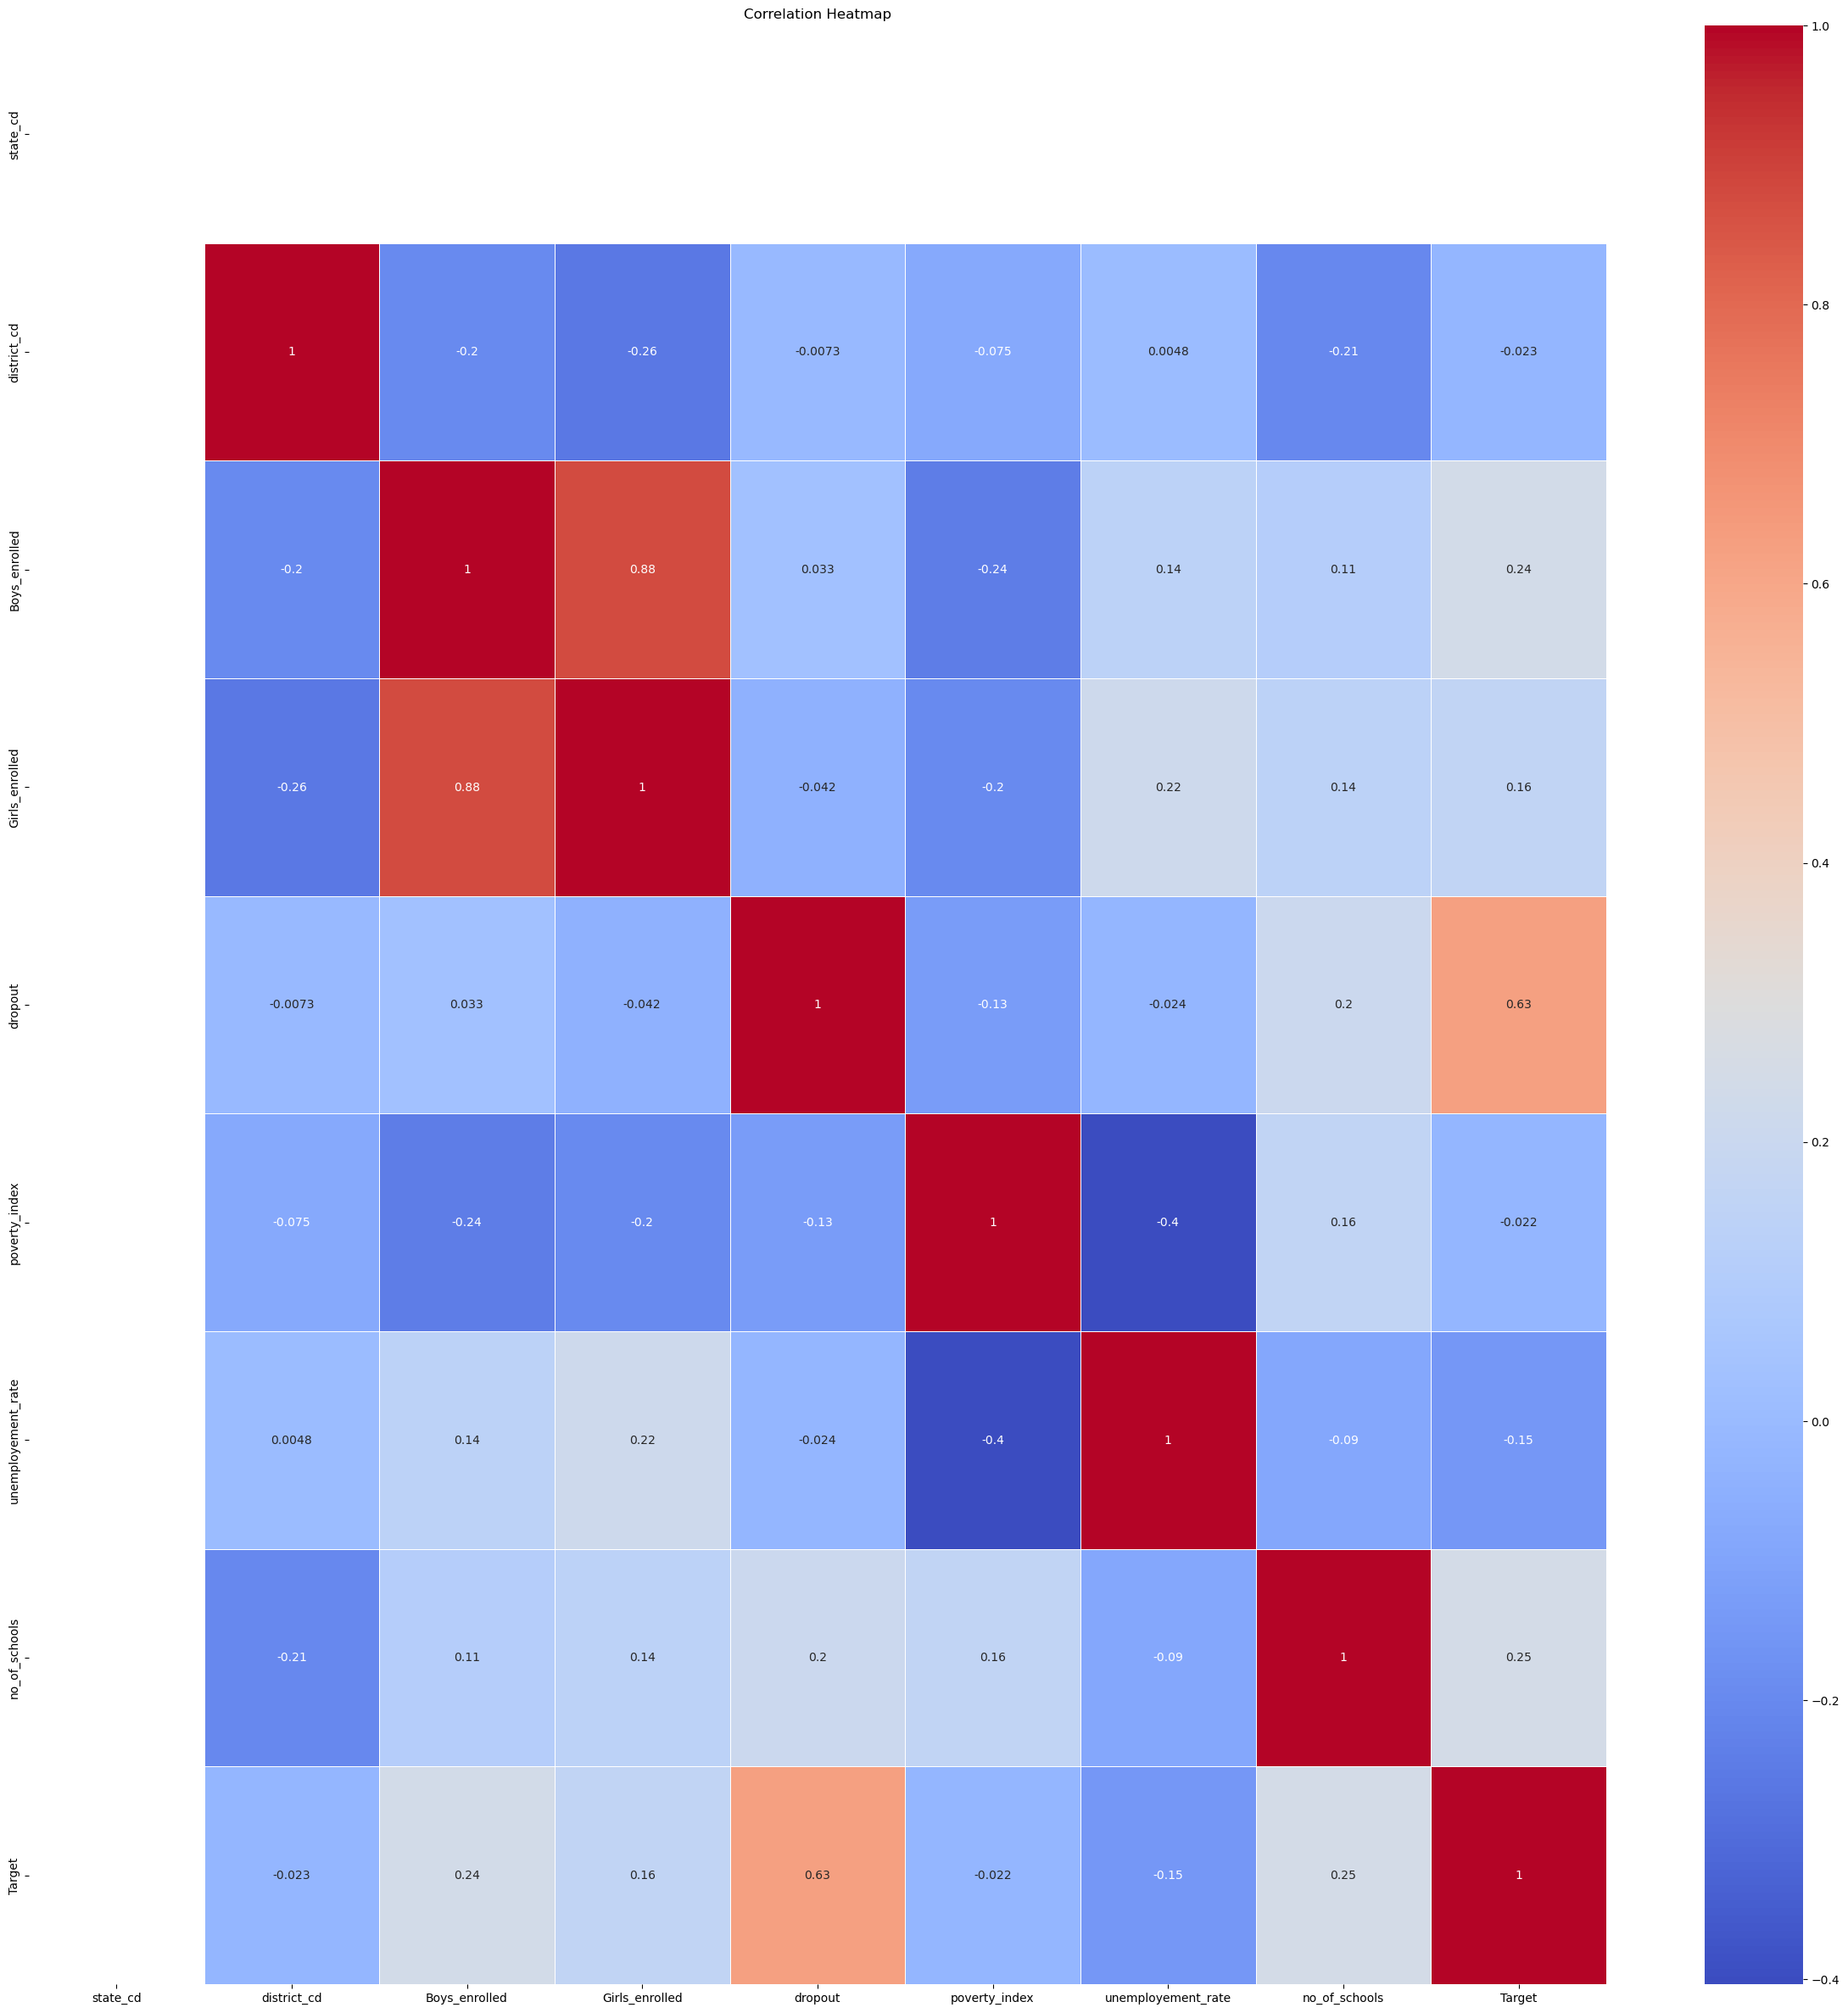

In [51]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [53]:
new_data = data.copy()
new_data = new_data.drop(columns=['state_cd','district_cd','YEAR','state_name','district_name','category'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Boys_enrolled       39 non-null     int64  
 1   Girls_enrolled      39 non-null     int64  
 2   dropout             39 non-null     float64
 3   poverty_index       39 non-null     float64
 4   unemployement_rate  39 non-null     float64
 5   no_of_schools       39 non-null     int64  
 6   Target              39 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.3 KB


Lets move on to the EDA part

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 3. Exploratory Data Analysis </b></p>
</div>

lets see how many dropouts, enrolled & graduates are there in Target column

In [54]:
new_data['Target'].value_counts()

2    16
0    14
1     9
Name: Target, dtype: int64

In [56]:
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='Dropout rate mid, low or high')

fig.update_traces(labels=['low','mid','high'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

c:\Users\Priyanshu\anaconda3\Lib\site-packages\numpy\core\numeric.py:2468: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Let's plot the Top 10 Features with Highest Correlation to Target

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_1492\4054896082.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



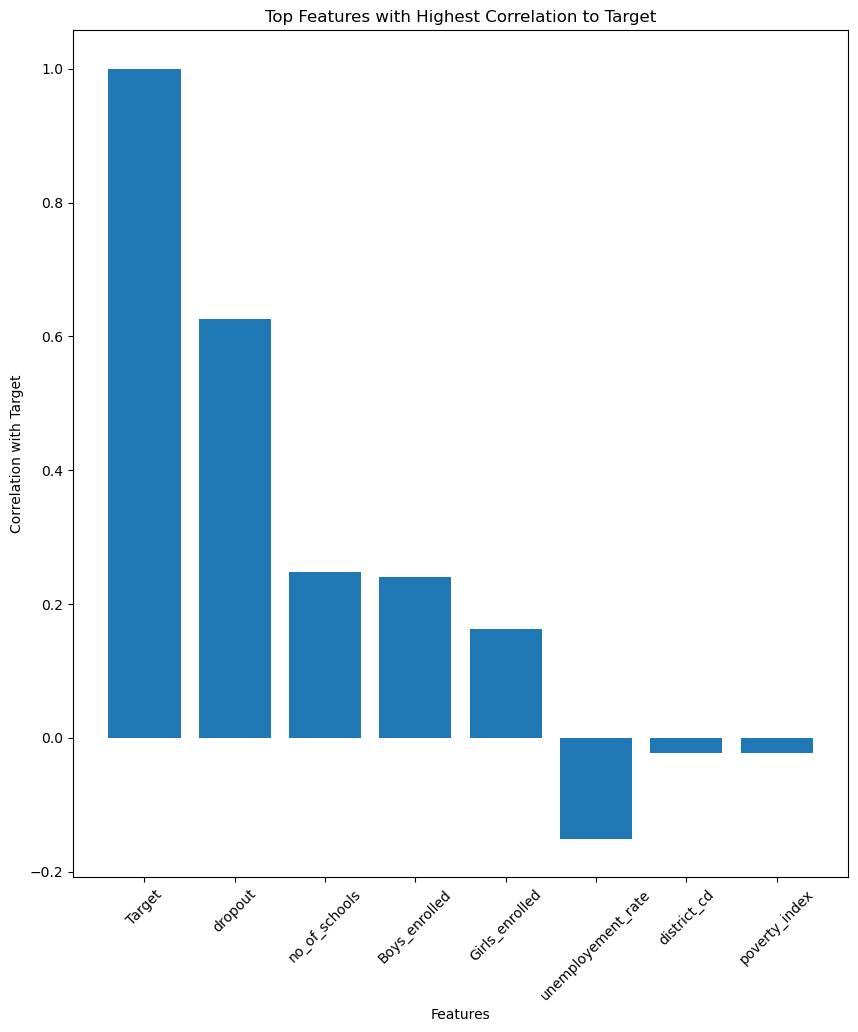

In [57]:
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

Distribution of age of students at the time of enrollment

In [68]:
px.histogram(new_data['dropout'], x='dropout',color_discrete_sequence=['lightblue'])

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='no_of_school', data=new_data)
plt.xlabel('Target')
plt.ylabel('No. of school')
plt.title('Relationship between Boys enrolled and Target')
plt.show()

ValueError: Could not interpret input 'no_of_school'

<Figure size 1000x600 with 0 Axes>

In [72]:
X = new_data.drop('Target', axis=1)
y = new_data['Target']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 4. Building Models </b></p>
</div>

In [20]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
xbc = XGBClassifier(tree_method='gpu_hist')
svm = svm.SVC(kernel='linear',probability=True)

In [21]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)
xbc.fit(X_train, y_train)
svm.fit(X_train, y_train)

c:\Users\Priyanshu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Priyanshu\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning:

[10:23:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"




SVC(kernel='linear', probability=True)

In [22]:
y_pred = dtree.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 69.38 %


In [23]:
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 80.56 %


In [24]:
y_pred = lr.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 78.08 %


In [27]:
y_pred = abc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.18 %


In [29]:
y_pred = svm.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.06 %
